# Network in Network (NiN)

## NiN Blocks

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
def nin_block(in_channels,out_channels,kernel_size,padding,stride):
    return nn.Sequential(
        nn.Conv2d(in_channels,out_channels,kernel_size=kernel_size,padding=padding,stride=stride), nn.ReLU(),
        nn.Conv2d(out_channels,out_channels,kernel_size=1,), nn.ReLU(),
        nn.Conv2d(out_channels,out_channels,kernel_size=1,), nn.ReLU(),
    )

In [3]:
def nin():
    return nn.Sequential(
        nin_block(1,96,11,0,4),
        nn.MaxPool2d(kernel_size=3,stride=2),
        nin_block(96,256,5,2,1),
        nn.MaxPool2d(kernel_size=3,stride=2),
        nin_block(256,384,3,1,1),
        nn.MaxPool2d(kernel_size=3,stride=2),
        nin_block(384,10,3,1,1),
        nn.AdaptiveAvgPool2d((1,1)),
        nn.Flatten(),
    )

In [4]:
X = torch.rand(1,1,224,224)
net = nin()
for l in net:
    X=l(X)
    print(f"{l.__class__.__name__:10}",X.shape)

Sequential torch.Size([1, 96, 54, 54])
MaxPool2d  torch.Size([1, 96, 26, 26])
Sequential torch.Size([1, 256, 26, 26])
MaxPool2d  torch.Size([1, 256, 12, 12])
Sequential torch.Size([1, 384, 12, 12])
MaxPool2d  torch.Size([1, 384, 5, 5])
Sequential torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d torch.Size([1, 10, 1, 1])
Flatten    torch.Size([1, 10])


## Training

loss 0.267, train acc 0.902, test acc 0.889
976.1 examples/sec on cuda:0


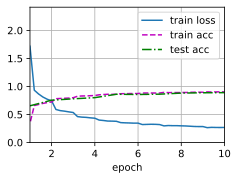

In [5]:
lr, num_epochs, batch_size = 0.1, 10, 64
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())